# Lab 5 - 27/10

Link github: https://github.com/ilariavascotto/UL_2023_fall

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from torchvision import datasets
import myfunctions as f
from sklearn.manifold import TSNE
from umap import UMAP

/home/giovanni/miniconda3/envs/python/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Data loading and preprocessing
n = 10000
data = datasets.FashionMNIST(root = "./data", train = True, transform = None, download = True).data.numpy()[:n, :]
labels = datasets.FashionMNIST(root = "./data", train = True, transform = None, download = True).targets.numpy()[:n]

data = data/255
data = data - data.mean(axis = 0)
data = data.reshape(n, 784)

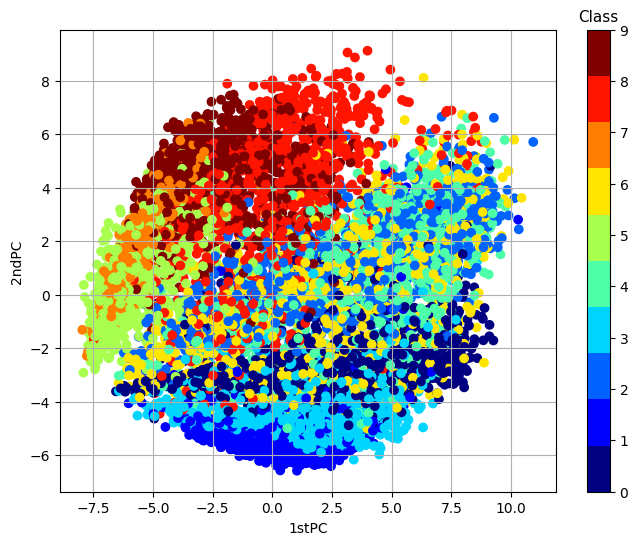

In [3]:
# PCA
plt.figure(figsize=(8,6))
cmap = plt.get_cmap('jet', 10)
pca_data = f.pca(data, 2)
p = plt.scatter(pca_data[:,0], pca_data[:,1], c=labels, cmap = cmap)
cb = plt.colorbar(p)
cb.ax.set_title('Class', fontsize=11)
plt.xlabel("1stPC")
plt.ylabel("2ndPC")
plt.grid()

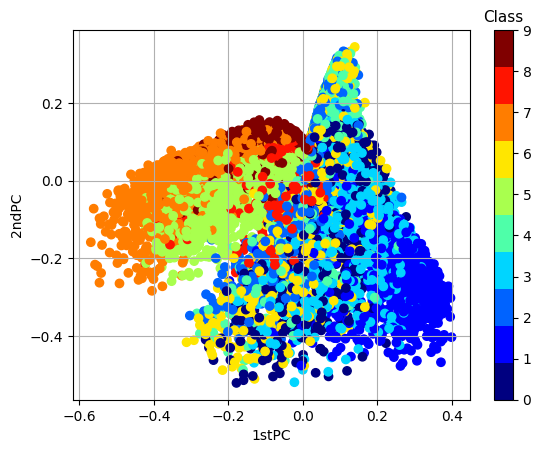

In [4]:
# Gaussian kernel PCA
g_kernelpca_data = f.kernel_PCA(data, 2, choice = 'rbf', sigma = 5)
p = plt.scatter(g_kernelpca_data[:,0], g_kernelpca_data[:,1], c=labels, cmap = cmap)
cb = plt.colorbar(p)
cb.ax.set_title('Class', fontsize=11)
plt.xlabel("1stPC")
plt.ylabel("2ndPC")
plt.grid()

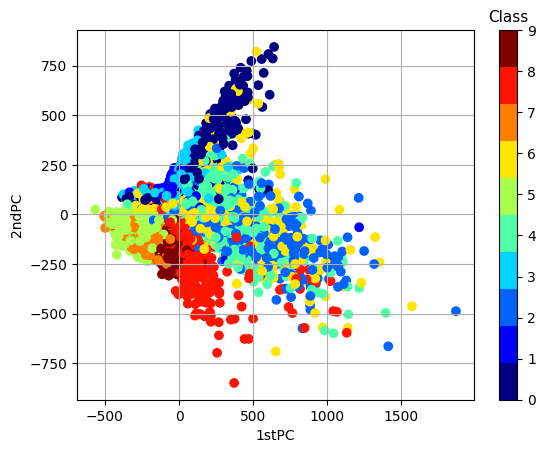

In [5]:
# Polynomial kernel PCA
p_kernelpca_data = f.kernel_PCA(data, 2, choice = 'polynomial', d = 3)
p = plt.scatter(p_kernelpca_data[:,0], p_kernelpca_data[:,1], c=labels, cmap = cmap)
cb = plt.colorbar(p)
cb.ax.set_title('Class', fontsize=11)
plt.xlabel("1stPC")
plt.ylabel("2ndPC")
plt.grid()

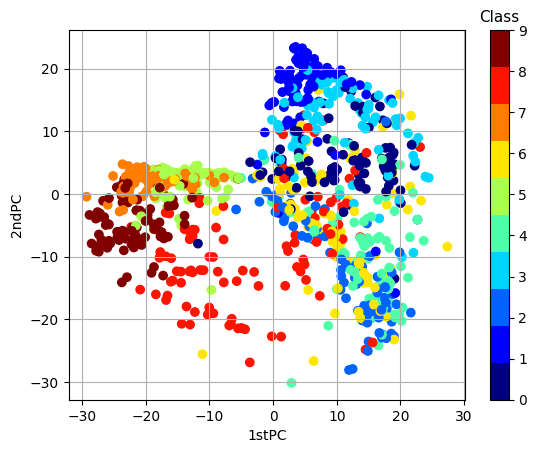

In [6]:
# Isomap
undersample_data = data[:1000, :]
isomap_labels = labels[:1000]
isomap_data = f.isomap(undersample_data, 2, 10)
p = plt.scatter(isomap_data[:,0], isomap_data[:,1], c=isomap_labels, cmap = cmap)
cb = plt.colorbar(p)
cb.ax.set_title('Class', fontsize=11)
plt.xlabel("1stPC")
plt.ylabel("2ndPC")
plt.grid()

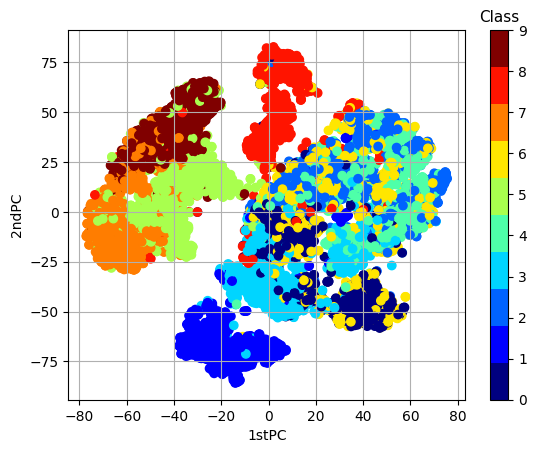

In [7]:
# t-SNE
tsne_data = TSNE(n_components=2).fit_transform(data)
p = plt.scatter(tsne_data[:,0], tsne_data[:,1], c=labels, cmap = cmap)
cb = plt.colorbar(p)
cb.ax.set_title('Class', fontsize=11)
plt.xlabel("1stPC")
plt.ylabel("2ndPC")
plt.grid()

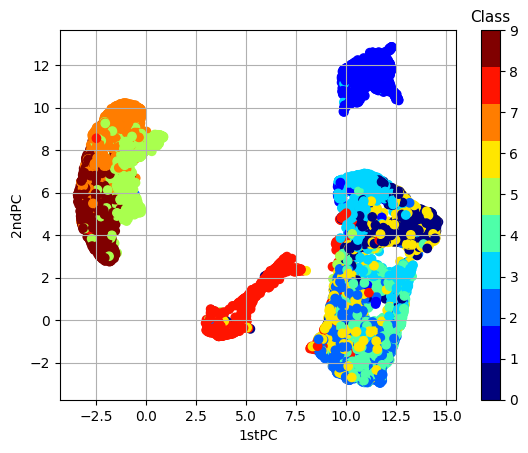

In [8]:
# UMAP
umap_data = UMAP(n_components=2).fit_transform(data)
p = plt.scatter(umap_data[:,0], umap_data[:,1], c=labels, cmap = cmap)
cb = plt.colorbar(p)
cb.ax.set_title('Class', fontsize=11)
plt.xlabel("1stPC")
plt.ylabel("2ndPC")
plt.grid()